# Запуск модели и сохранение полученных данных

In [24]:
import subprocess

def start_model(mode, height, width, n_preys, n_predators, seed):
    
    height = str(height)
    width = str(width)
    n_preys = str(n_preys)
    n_predators = str(n_predators)
    seed = str(seed)
    
    model = subprocess.run(["pp-model", mode, width, height, n_predators, n_preys, seed], stdout=subprocess.PIPE)
    return_code = model.returncode
    filename = '%sx%s_%s_%s_%s.csv' % (width, height, n_predators, n_preys, seed)
    f = open(filename, 'r')
    
    if mode == "L":
        predators = []
        preys = []

        for line in f:
            data = line.split(',')
            predators.append(int(data[1]))
            preys.append(int(data[2]))
        return predators, preys, return_code
    else:
        return return_code

predators, preys, steps = start_model("L", 200, 200, 3000, 3000, 13)

# Анализ данных и построение графика завсимости количества агентов в моделе от числа шагов

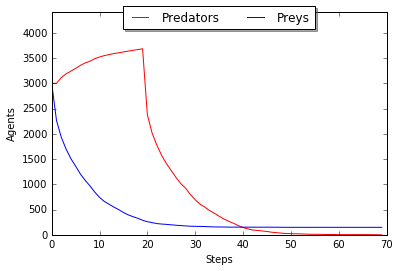

In [25]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

t = np.arange(0, steps + 1)
plt.plot(t, predators, "r", label="Predators")
plt.plot(t, preys, "b", label="Preys")
plt.ylim([0, max(predators + preys) * 1.2])
plt.ylabel("Agents")
plt.xlabel("Steps")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), shadow=True, ncol=2)
plt.show()